<a href="https://colab.research.google.com/github/tewei0328/trade-backtest/blob/main/0-viz/viz1_data1_finmind_stock_option_future.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Day 14] 回測分析
### 從零開始的套牢生活 - AI股票預測系統 系列 第 14 篇
https://ithelp.ithome.com.tw/m/articles/10267871?fbclid=IwAR0GdoJVPIJ6VfcSdAfJzWAgHoaYahPsyBVIAY9NzjhNIfmmWHfsKYJC7Os

# 引入函式庫

In [1]:
# ! pip install backtesting
import datetime
import warnings

import pandas as pd
import requests
#from backtesting import Backtest, Strategy
#from backtesting.lib import crossover
#from backtesting.test import SMA
#from pandas.core.common import SettingWithCopyWarning

#warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
pd.set_option("display.max_columns", None)


# 取得資料
backtesting強制要求欄位名稱格式，
所以需要先轉換欄位名稱

https://finmindtrade.com/analysis/#/data/document

## 1-股票

In [2]:
stock_index = '0050'
url = "https://api.finmindtrade.com/api/v4/data"
parameter = {
    "dataset": "TaiwanStockPrice",
    "start_date": datetime.datetime(2023, 4, 1, 0, 0).strftime("%Y-%m-%d"),
    "end_date": datetime.datetime(2023, 5, 13, 0, 0).strftime("%Y-%m-%d"),
    "data_id": stock_index,
}

data = requests.get(url, params=parameter)
data = data.json()



In [ ]:
data

In [ ]:
df1 = pd.DataFrame(data["data"])

df1.index = pd.to_datetime(df1["date"])
df1.rename(
    columns={
        "Trading_Volume": "Volume",
        "open": "Open",
        "max": "High",
        "min": "Low",
        "close": "Close",
    },
    inplace=True,
)

df1.drop(
    columns=["stock_id", "date", "Trading_money", "spread", "Trading_turnover"],
    inplace=True,
)

df1

In [ ]:
df1.head()

,Volume,Open,High,Low,Close
date,,,,,
2023-04-06,8076540,120.85,121.00,120.20,121.00
2023-04-07,4623088,121.25,121.45,120.80,121.00
2023-04-10,4503497,121.25,121.65,120.90,121.00
2023-04-11,6233410,121.00,121.15,120.40,120.85
2023-04-12,3247078,120.85,120.85,120.15,120.55


<Axes: xlabel='date'>

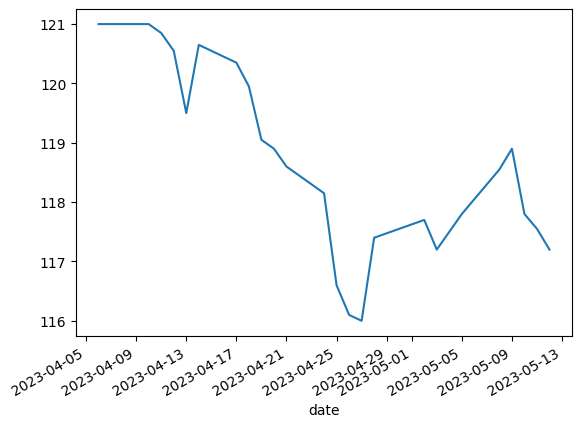

In [4]:
df1['Close'].plot()

## FinMind API 使用說明
https://finmindtrade.com/analysis/#/data/api

## 選擇權日夜盤成交資訊，包含到期月份、開高低收、漲跌幅、交易量、結算價格。
https://finmindtrade.com/analysis/#/data/document

## 2-選擇權

In [5]:
stock_index = "TXO"
url = "https://api.finmindtrade.com/api/v4/data"
parameter = {
    "dataset": "TaiwanOptionDaily",
    "start_date": datetime.datetime(2023, 4, 1, 0, 0).strftime("%Y-%m-%d"),
    "end_date": datetime.datetime(2023, 5, 13, 0, 0).strftime("%Y-%m-%d"),
    "data_id": stock_index,
}

data = requests.get(url, params=parameter)
data = data.json()


In [ ]:
data

In [6]:
df = pd.DataFrame(data["data"])
df.head()

,date,option_id,contract_date,strike_price,call_put,open,max,min,close,volume,settlement_price,open_interest,trading_session
0,2023-04-06,TXO,202304W1,13900.0,call,0.0,0.0,0.0,0.0,0,0.0,1,position
1,2023-04-06,TXO,202304W1,13900.0,call,0.0,0.0,0.0,0.0,0,0.0,0,after_market
2,2023-04-06,TXO,202304W1,13900.0,put,0.0,0.0,0.0,0.0,0,0.0,156,position
3,2023-04-06,TXO,202304W1,13900.0,put,0.0,0.0,0.0,0.0,0,0.0,0,after_market
4,2023-04-06,TXO,202304W1,14000.0,call,0.0,0.0,0.0,0.0,0,0.0,0,position


In [7]:
df = pd.DataFrame(data["data"])

df.index = pd.to_datetime(df["date"])
df.rename(
    columns={
        "open": "Open",
        "max": "High",
        "min": "Low",
        "close": "Close",
    },
    inplace=True,
)

df.drop(
    #columns=["option_id", "date", "settlement_price", "open_interest", "trading_session"],
    columns=["option_id", "date", "settlement_price", "open_interest"],
    inplace=True,
)

df

,contract_date,strike_price,call_put,Open,High,Low,Close,volume,trading_session
date,,,,,,,,,
2023-04-06,202304W1,13900.0,call,0.0,0.0,0.0,0.0,0,position
2023-04-06,202304W1,13900.0,call,0.0,0.0,0.0,0.0,0,after_market
2023-04-06,202304W1,13900.0,put,0.0,0.0,0.0,0.0,0,position
2023-04-06,202304W1,13900.0,put,0.0,0.0,0.0,0.0,0,after_market
2023-04-06,202304W1,14000.0,call,0.0,0.0,0.0,0.0,0,position
...,...,...,...,...,...,...,...,...,...
2023-05-12,202312,19000.0,put,0.0,0.0,0.0,0.0,0,after_market
2023-05-12,202312,19200.0,call,0.0,0.0,0.0,0.0,0,position
2023-05-12,202312,19200.0,call,13.0,13.0,7.1,7.1,5,after_market


In [8]:
def get_options(option_df, contract_period, put_or_call, strike_price, trade_period):
    
    option_df = df.loc[(df['contract_date'] == contract_period) & \
                       (df['call_put'] == put_or_call) & \
                       (df['strike_price'] == strike_price) & \
                       (df['trading_session'] == trade_period) ]
    return option_df

In [9]:
df2=get_options(df, '202305', 'call', 16000, 'position')

In [10]:
df2.head()

,contract_date,strike_price,call_put,Open,High,Low,Close,volume,trading_session
date,,,,,,,,,
2023-04-06,202305,16000.0,call,237.0,237.0,194.0,204.0,189,position
2023-04-07,202305,16000.0,call,227.0,239.0,211.0,218.0,97,position
2023-04-10,202305,16000.0,call,225.0,259.0,217.0,226.0,282,position
2023-04-11,202305,16000.0,call,207.0,267.0,207.0,246.0,218,position
2023-04-12,202305,16000.0,call,253.0,253.0,216.0,235.0,203,position


<Axes: xlabel='date'>

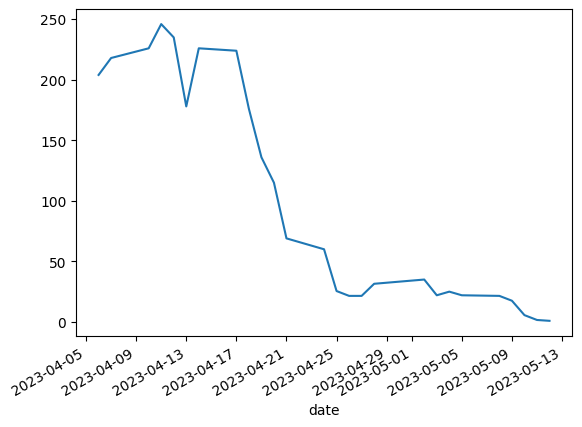

In [11]:
df2['Close'].plot()

In [12]:
df4=get_options(df, '202305', 'put', 15000, 'position')

In [13]:
df4.head()

,contract_date,strike_price,call_put,Open,High,Low,Close,volume,trading_session
date,,,,,,,,,
2023-04-06,202305,15000.0,put,120.0,138.0,115.0,119.0,346,position
2023-04-07,202305,15000.0,put,101.0,104.0,94.0,98.0,241,position
2023-04-10,202305,15000.0,put,88.0,90.0,78.0,85.0,178,position
2023-04-11,202305,15000.0,put,80.0,83.0,66.0,70.0,859,position
2023-04-12,202305,15000.0,put,60.0,70.0,60.0,61.0,657,position


<Axes: xlabel='date'>

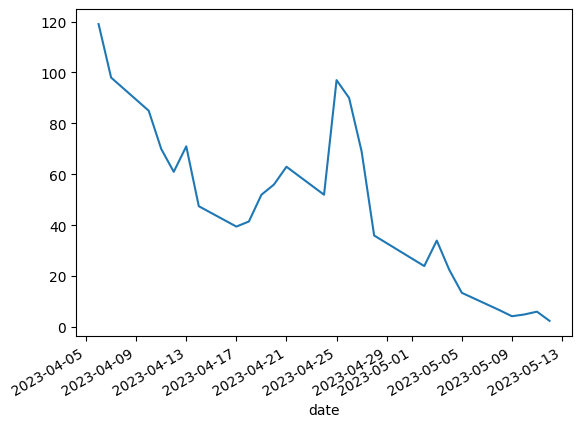

In [14]:
df4['Close'].plot()

## 3-期貨

## 期貨日成交資訊
https://finmindtrade.com/analysis/#/data/api

In [15]:
stock_index = "TX"
url = "https://api.finmindtrade.com/api/v4/data"
parameter = {
    "dataset": "TaiwanFuturesDaily",
    "start_date": datetime.datetime(2023, 4, 1, 0, 0).strftime("%Y-%m-%d"),
    "end_date": datetime.datetime(2023, 5, 13, 0, 0).strftime("%Y-%m-%d"),
    "data_id": stock_index,
}

data = requests.get(url, params=parameter)
data = data.json()


In [ ]:
data

In [16]:
df = pd.DataFrame(data["data"])
df.index = pd.to_datetime(df["date"])
df.head()

,date,futures_id,contract_date,open,max,min,close,spread,spread_per,volume,settlement_price,open_interest,trading_session
date,,,,,,,,,,,,,
2023-04-06,2023-04-06,TX,202304,15780.0,15793.0,15701.0,15760.0,-104.0,-0.66,71495,15762.0,68514,position
2023-04-06,2023-04-06,TX,202304,15848.0,15928.0,15810.0,15919.0,55.0,0.35,39855,0.0,0,after_market
2023-04-06,2023-04-06,TX,202305,15793.0,15793.0,15678.0,15737.0,-100.0,-0.63,1362,15737.0,4392,position
2023-04-06,2023-04-06,TX,202305,15808.0,15902.0,15785.0,15891.0,54.0,0.34,501,0.0,0,after_market
2023-04-06,2023-04-06,TX,202306,15700.0,15700.0,15615.0,15670.0,-101.0,-0.64,172,15670.0,1221,position


In [17]:
def get_futures(option_df, contract_period, trading_session):
    
    option_df = df.loc[(df['contract_date'] == contract_period) & \
                       (df['trading_session'] == trading_session) ]
    return option_df

In [18]:
df3=get_futures(df, '202305', 'position')

In [19]:
df3.head()

,date,futures_id,contract_date,open,max,min,close,spread,spread_per,volume,settlement_price,open_interest,trading_session
date,,,,,,,,,,,,,
2023-04-06,2023-04-06,TX,202305,15793.0,15793.0,15678.0,15737.0,-100.0,-0.63,1362,15737.0,4392,position
2023-04-07,2023-04-07,TX,202305,15807.0,15842.0,15772.0,15791.0,54.0,0.34,748,15793.0,4498,position
2023-04-10,2023-04-10,TX,202305,15805.0,15898.0,15802.0,15823.0,30.0,0.19,1322,15823.0,4933,position
2023-04-11,2023-04-11,TX,202305,15810.0,15931.0,15801.0,15897.0,74.0,0.47,1903,15894.0,5536,position
2023-04-12,2023-04-12,TX,202305,15922.0,15929.0,15838.0,15895.0,1.0,0.01,1361,15895.0,5777,position


<Axes: xlabel='date'>

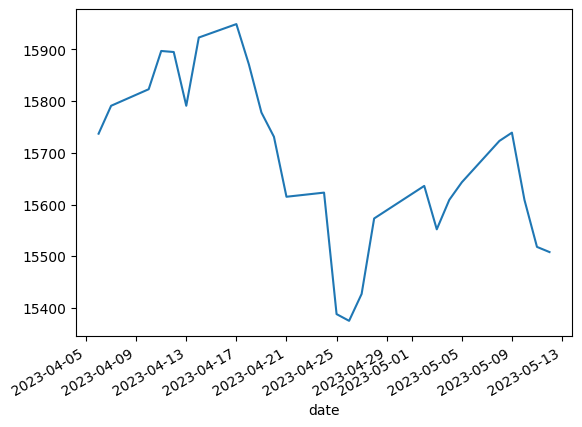

In [20]:
df3['close'].plot()

In [ ]:
df3.close

In [21]:
df_many = pd.concat([df1.Close, df2.Close, df3.close, df4.Close], axis=1)


In [22]:
df_many.columns=['0050','16000call','future', '15000put']

In [23]:
df_many.head()

,0050,16000call,future,15000put
date,,,,
2023-04-06,121.00,204.0,15737.0,119.0
2023-04-07,121.00,218.0,15791.0,98.0
2023-04-10,121.00,226.0,15823.0,85.0
2023-04-11,120.85,246.0,15897.0,70.0
2023-04-12,120.55,235.0,15895.0,61.0


<Axes: xlabel='date'>

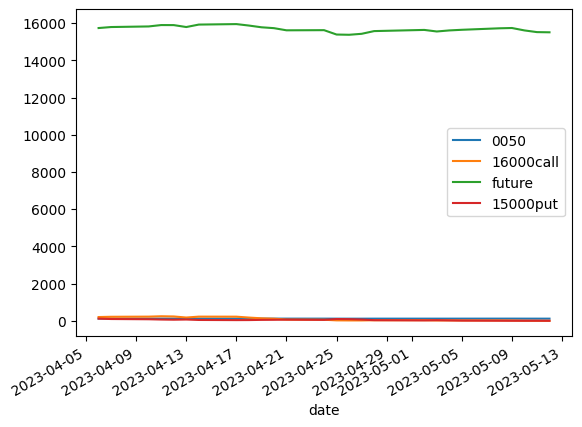

In [24]:
df_many.plot()

In [25]:
df_many['0050']=df_many['0050']/df_many.iloc[0][0]
df_many['16000call']=df_many['16000call']/df_many.iloc[0][1]
df_many['future']=df_many['future']/df_many.iloc[0][2]
df_many['15000put']=df_many['15000put']/df_many.iloc[0][3]

In [26]:
df_many.head()

,0050,16000call,future,15000put
date,,,,
2023-04-06,1.000000,1.000000,1.000000,1.000000
2023-04-07,1.000000,1.068627,1.003431,0.823529
2023-04-10,1.000000,1.107843,1.005465,0.714286
2023-04-11,0.998760,1.205882,1.010167,0.588235
2023-04-12,0.996281,1.151961,1.010040,0.512605


<Axes: xlabel='date'>

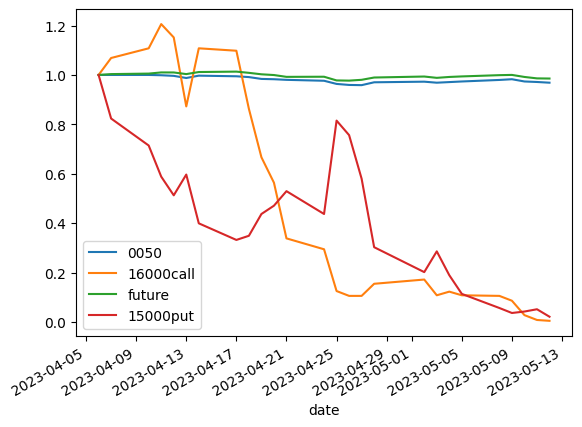

In [27]:
df_many.plot()

# 回測策略
如果快線超過慢線，表示股票進入上漲的趨勢，此時進行買空操作，分析圖表以![https://ithelp.ithome.com.tw/upload/images/20210919/20141586vhDmTPQp9Z.png](https://ithelp.ithome.com.tw/upload/images/20210919/20141586vhDmTPQp9Z.png)表示。\
如果快線跌過慢線，表示股票進入下跌的趨勢，此時進行賣空操作，分析圖表以![https://ithelp.ithome.com.tw/upload/images/20210919/20141586Y98Ntg07AE.png](https://ithelp.ithome.com.tw/upload/images/20210919/20141586Y98Ntg07AE.png)表示。\
綠色代表上一次操作的獲利情形，綠色表示獲利，綠色表示賠錢。

In [ ]:
class SmaCross(Strategy):
    def init(self):
        self.fast_line = self.I(SMA, self.data.Close, 20)
        self.slow_line = self.I(SMA, self.data.Close, 50)

    def next(self):
        if crossover(self.fast_line, self.slow_line):
            print(
                f"{self.data.index[-1]} Buy: Price: {self.data.Close[-1]}, Slow: {self.slow_line[-5:]}, Fast: {self.fast_line[-5:]}"
            )
            self.buy()
        elif crossover(self.slow_line, self.fast_line):
            print(
                f"{self.data.index[-1]} Sell: Price: {self.data.Close[-1]}, Slow: {self.slow_line[-5:]}, Fast: {self.fast_line[-5:]}"
            )

            self.sell()


In [ ]:
class SmaCross1(Strategy):
# 只多不空  
    def init(self):
        self.fast_line = self.I(SMA, self.data.Close, 20)
        self.slow_line = self.I(SMA, self.data.Close, 50)

    def next(self):
        if crossover(self.fast_line, self.slow_line):
            print(
                f"{self.data.index[-1]} Buy: Price: {self.data.Close[-1]}, Slow: {self.slow_line[-5:]}, Fast: {self.fast_line[-5:]}"
            )
            #self.buy()
            # If ema1 crosses above ema2, buy the asset
            #self.position.close()
            self.buy()
        elif crossover(self.slow_line, self.fast_line):
            print(
                f"{self.data.index[-1]} Sell: Price: {self.data.Close[-1]}, Slow: {self.slow_line[-5:]}, Fast: {self.fast_line[-5:]}"
            )
            self.position.close()
            #self.sell()

# 執行策略
- cash：本金。
- commission：交易費用。
- exclusive_orders：是否禁止多頭操作(同時只能買空或賣空)。
- trade_on_close：於收盤時交易，否則預設於開盤交易。

exclusive_orders：若為True時，每次操作前自動關閉(close)上次操作。
Buy(500)、Buy(1000) -> 最後持股1000
Buy(500)、Sell(500) -> 賣空500
.
如果trade_on_close是True，市價訂單將根據當前柱的收盤價而不是下一個柱的開盤價執行。

如果hedging是True，則允許同時雙向交易。如果False，則反向訂單首先以FIFO方式關閉現有交易。

如果exclusive_orders是True，每個新訂單都會自動關閉之前的交易/頭寸，每次最多進行一次有效的交易（多頭或空頭）。

In [ ]:
test = Backtest(
    df,
    SmaCross1,
    cash=1000000,
    commission=0.004,
    exclusive_orders=True,
    trade_on_close=True,
)
result = test.run()


2015-04-17 00:00:00 Sell: Price: 142.5, Slow: [146.86 146.92 146.98 147.02 146.97], Fast: [147.725 147.475 147.325 147.225 146.675]
2015-05-18 00:00:00 Buy: Price: 146.5, Slow: [147.44 147.39 147.33 147.25 147.17], Fast: [146.725 146.925 147.075 147.05  147.25 ]
2015-05-27 00:00:00 Sell: Price: 145.0, Slow: [147.05 147.08 147.11 147.08 147.  ], Fast: [147.725 147.65  147.4   147.15  146.825]
2015-10-07 00:00:00 Buy: Price: 135.0, Slow: [128.86 128.72 128.65 128.57 128.59], Fast: [127.525 127.85  128.125 128.525 129.15 ]
2016-01-11 00:00:00 Sell: Price: 133.0, Slow: [140.45 140.38 140.28 140.23 140.16], Fast: [141.475 141.125 140.75  140.4   140.075]
2016-02-18 00:00:00 Buy: Price: 151.0, Slow: [139.78 139.83 140.   140.18 140.35], Fast: [137.95  138.5   139.225 139.975 140.85 ]
2016-05-06 00:00:00 Sell: Price: 148.0, Slow: [155.56 155.55 155.47 155.4  155.34], Fast: [157.175 156.45  155.875 155.575 155.25 ]
2016-06-13 00:00:00 Buy: Price: 162.0, Slow: [154.36 154.41 154.49 154.62 154.6

# 分析結果
將分析結果儲存，並利用預設瀏覽器開啟，
result為詳細的分析結果。

In [ ]:
test.plot()
print(result)

Start                     2015-01-05 00:00:00
End                       2023-05-05 00:00:00
Duration                   3042 days 00:00:00
Exposure Time [%]                   96.753566
Equity Final [$]                  1577378.174
Equity Peak [$]                   2758836.636
Return [%]                          57.737817
Buy & Hold Return [%]              258.422939
Return (Ann.) [%]                    5.812039
Volatility (Ann.) [%]                25.17699
Sharpe Ratio                         0.230847
Sortino Ratio                        0.355037
Calmar Ratio                         0.134267
Max. Drawdown [%]                  -43.287321
Avg. Drawdown [%]                   -6.434191
Max. Drawdown Duration     1572 days 00:00:00
Avg. Drawdown Duration      111 days 00:00:00
# Trades                                   35
Win Rate [%]                        28.571429
Best Trade [%]                      99.876171
Worst Trade [%]                    -13.989794
Avg. Trade [%]                    

In [ ]:
#test.plot(filename=f"./backtest_result/{stock_index}.html")
#print(result)

![https://ithelp.ithome.com.tw/upload/images/20210919/20141586nTsggfN69g.png](https://ithelp.ithome.com.tw/upload/images/20210919/20141586nTsggfN69g.png)


欄位 | 說明
------------- | -------------
Start                  |   起始時間
End                    |   結束時間
Duration               |   經過天數
Exposure [%]           |   投資比率
Equity Final [$]       |   最終資產
Equity Peak [$]        |   最高資產
Return [%]             |   報酬率
Buy & Hold Return [%]  |   買入持有報酬率
Max. Drawdown [%]      |   最大交易回落
Avg. Drawdown [%]      |   平均交易回落
Max. Drawdown Duration |   最長交易回落期間
Avg. Drawdown Duration |   平均交易回落期間
Win Rate [%]           |   勝率
Best Trade [%]         |   最好交易報酬率
Worst Trade [%]        |   最差交易報酬率
Avg. Trade [%]         |   平均交易報酬率
Max. Trade Duration    |   最長交易間隔
Avg. Trade Duration    |   平均交易間隔
Expectancy [%]         |   期望值
SQN                    |   系統品質指標
Sharpe Ratio           |   夏普比率
Sortino Ratio          |   索丁諾比率
Calmar Ratio           |   卡瑪比率
_strategy              |   使用策略名稱
*From https://hackmd.io/@s02260441/SkA7IWVJv*
